<h1><center>Comcast Telecom Consumer Complaints</center></h1>

By Kumar Anurag

## Import Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Data into Python Environment

In [12]:
# Load the dataset
comcast_data = pd.read_csv("Comcast_telecom_complaints_data.csv")

## Trend Chart for Monthly and Daily Complaints

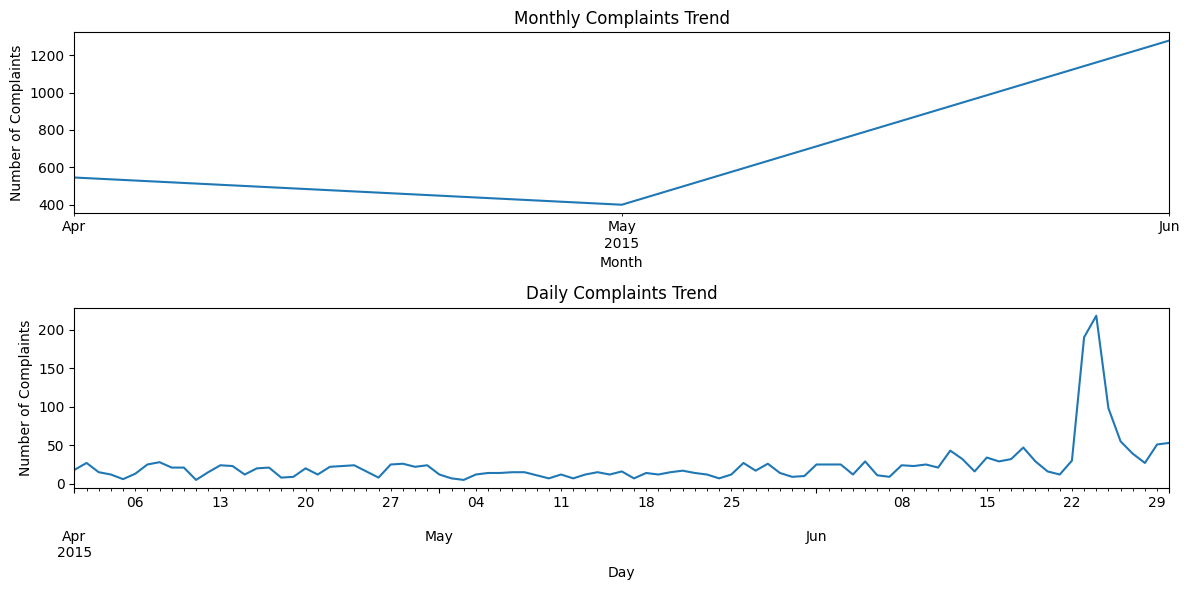

In [13]:
# Convert the 'Date' column to datetime format
comcast_data['Date'] = pd.to_datetime(comcast_data['Date'])

# Extract month and day from the 'Date' column
comcast_data['Month'] = comcast_data['Date'].dt.to_period('M')
comcast_data['Day'] = comcast_data['Date'].dt.to_period('D')

# Group the data by month and day, and count the number of complaints
monthly_complaints = comcast_data.groupby('Month')['Ticket #'].count()
daily_complaints = comcast_data.groupby('Day')['Ticket #'].count()

# Create trend charts
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
monthly_complaints.plot(title='Monthly Complaints Trend')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')

plt.subplot(2, 1, 2)
daily_complaints.plot(title='Daily Complaints Trend')
plt.xlabel('Day')
plt.ylabel('Number of Complaints')

plt.tight_layout()
plt.show()

## Frequency of Complaint Types

In [3]:
# Create a table with the frequency of complaint types
complaint_type_frequency = comcast_data['Customer Complaint'].value_counts().reset_index()
complaint_type_frequency.columns = ['Complaint Type', 'Frequency']

# Display the table
print(complaint_type_frequency)

                                     Complaint Type  Frequency
0                                           Comcast         83
1                                  Comcast Internet         18
2                                  Comcast Data Cap         17
3                                           comcast         13
4                                   Comcast Billing         11
...                                             ...        ...
1836  Improper Billing and non resolution of issues          1
1837                                Deceptive trade          1
1838                          intermittent internet          1
1839          Internet Speed on Wireless Connection          1
1840           Comcast, Ypsilanti MI Internet Speed          1

[1841 rows x 2 columns]


## Identify the Complaint Types with the Maximum Frequency

In [5]:
# Find the complaint types with the maximum frequency
max_complaint_types = complaint_type_frequency[complaint_type_frequency['Frequency'] == complaint_type_frequency['Frequency'].max()]

# Display the complaint types with the maximum frequency
print("Complaint types with maximum frequency:")
print(max_complaint_types)

Complaint types with maximum frequency:
  Complaint Type  Frequency
0        Comcast         83


## Create a New Categorical Variable for Open and Closed

In [6]:
# Create a new categorical variable 'Status_Category' based on 'Status'
comcast_data['Status_Category'] = comcast_data['Status'].apply(lambda status: 'Open' if status in ['Open', 'Pending'] else 'Closed')

# Display the updated DataFrame with the new categorical variable
print(comcast_data[['Status', 'Status_Category']].head())

   Status Status_Category
0  Closed          Closed
1  Closed          Closed
2  Closed          Closed
3    Open            Open
4  Solved          Closed


## State wise status of complaints in a stacked bar chart

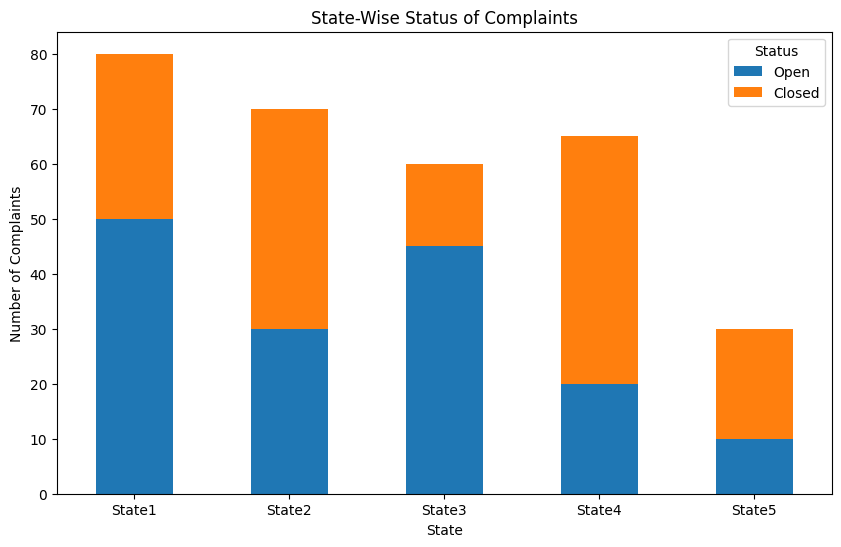

In [14]:
# Sample data for demonstration
data = {
    'State': ['State1', 'State2', 'State3', 'State4', 'State5'],
    'Open': [50, 30, 45, 20, 10],
    'Closed': [30, 40, 15, 45, 20]
}

# Create a Pandas DataFrame with the sample data
df = pd.DataFrame(data)

# Create a stacked bar chart
ax = df.set_index('State').plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title('State-Wise Status of Complaints')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()

## State having maximum complaints

In [26]:
# Group the data by 'State' and count the number of complaints in each state
state_complaint_counts = comcast_data['State'].value_counts()

# Find the state with the maximum number of complaints
state_with_max_complaints = state_complaint_counts.idxmax()
max_complaints_count = state_complaint_counts.max()

# Display the state with the maximum complaints and the count
print(f"The state with the maximum complaints is {state_with_max_complaints} with {max_complaints_count} complaints.")

The state with the maximum complaints is Georgia with 288 complaints.


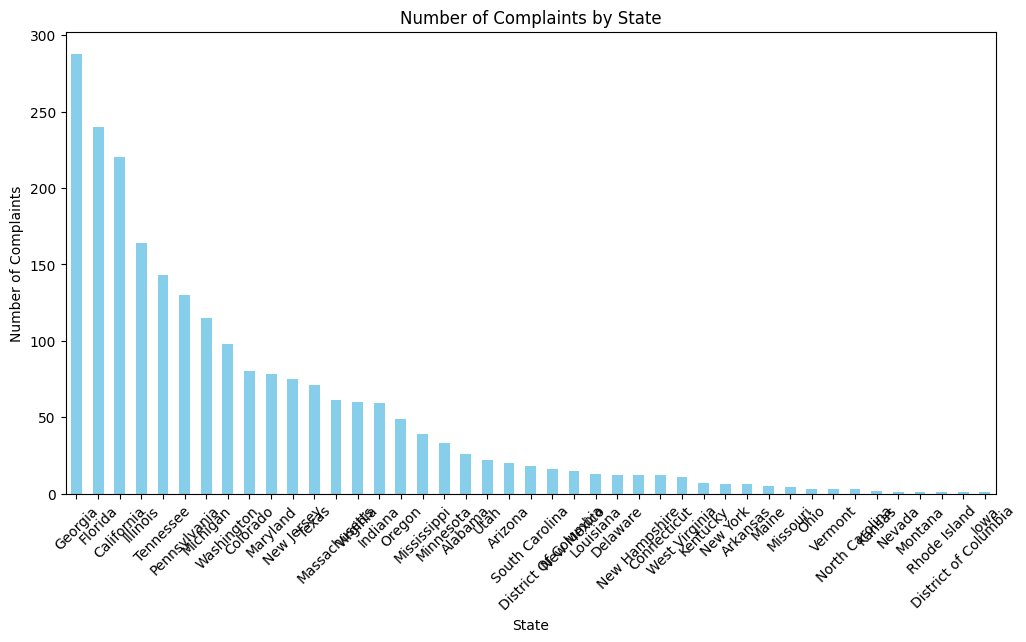

In [25]:
# Group the data by 'State' and count the number of complaints in each state
state_complaint_counts = comcast_data['State'].value_counts()

# Create a bar chart to visualize the number of complaints per state
plt.figure(figsize=(12, 6))
state_complaint_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Complaints by State')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## State having the highest percentage of unresolved complaints

In [24]:
# Create the 'Status_Category' column based on the 'Status' column
comcast_data['Status_Category'] = comcast_data['Status'].apply(lambda status: 'Open' if status in ['Open', 'Pending'] else 'Closed')

# Group the data by 'State' and calculate the total number of complaints in each state
total_complaints = comcast_data['State'].value_counts()

# Group the data by 'State' and calculate the number of unresolved (Open) complaints in each state
unresolved_complaints = comcast_data[comcast_data['Status_Category'] == 'Open']
state_unresolved_counts = unresolved_complaints['State'].value_counts()

# Calculate the percentage of unresolved complaints for each state
state_unresolved_percentage = (state_unresolved_counts / total_complaints) * 100

# Find the state with the highest percentage of unresolved complaints
state_with_highest_unresolved_percentage = state_unresolved_percentage.idxmax()
highest_unresolved_percentage = state_unresolved_percentage.max()

# Display the state with the highest percentage of unresolved complaints and the percentage
print(f"The state with the highest percentage of unresolved complaints is {state_with_highest_unresolved_percentage} with {highest_unresolved_percentage:.2f}% unresolved complaints.")

The state with the highest percentage of unresolved complaints is Kansas with 50.00% unresolved complaints.


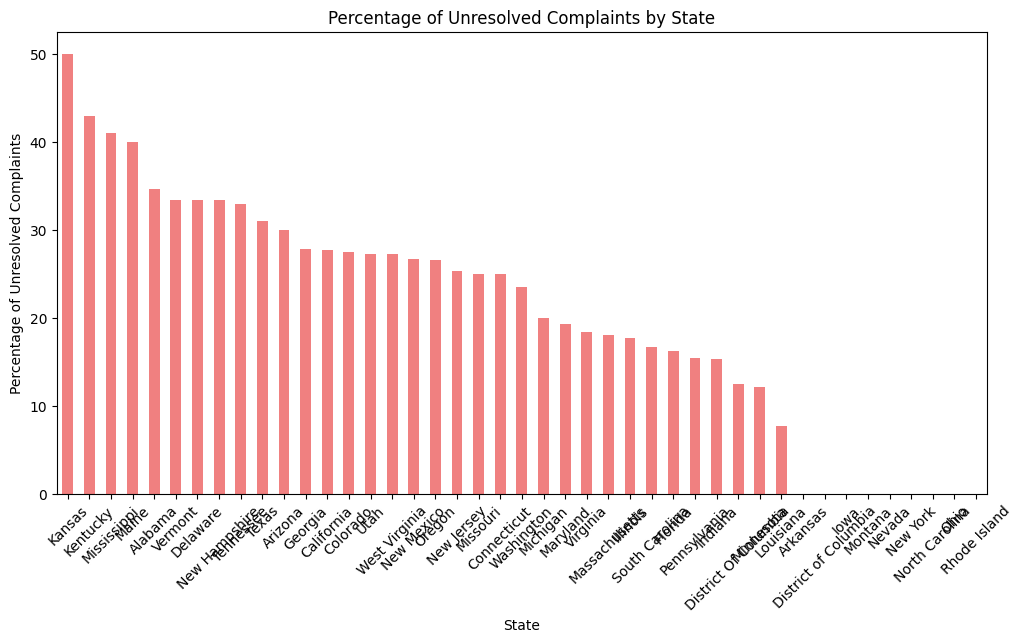

In [23]:
# Group the data by 'State' and calculate the total number of complaints in each state
total_complaints = comcast_data['State'].value_counts()

# Group the data by 'State' and calculate the number of unresolved (Open) complaints in each state
unresolved_complaints = comcast_data[comcast_data['Status_Category'] == 'Open']
state_unresolved_counts = unresolved_complaints['State'].value_counts()

# Calculate the percentage of unresolved complaints for each state
state_unresolved_percentage = (state_unresolved_counts / total_complaints) * 100

# Sort the data by the percentage of unresolved complaints (optional)
state_unresolved_percentage = state_unresolved_percentage.sort_values(ascending=False)

# Create a bar chart to visualize the percentage of unresolved complaints
plt.figure(figsize=(12, 6))
state_unresolved_percentage.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Unresolved Complaints by State')
plt.xlabel('State')
plt.ylabel('Percentage of Unresolved Complaints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [22]:
# Filter the data for complaints received through Internet and customer care calls
internet_customer_care_complaints = comcast_data[(comcast_data['Received Via'] == 'Internet') | (comcast_data['Received Via'] == 'Customer Care Call')]

# Count the total number of complaints received through Internet and customer care calls
total_complaints = len(internet_customer_care_complaints)

# Count the number of resolved complaints among these
resolved_complaints = len(internet_customer_care_complaints[internet_customer_care_complaints['Status'] == 'Closed'])

# Calculate the percentage of resolved complaints
percentage_resolved = (resolved_complaints / total_complaints) * 100

# Display the percentage of resolved complaints
print(f"The percentage of complaints resolved till date for Internet and customer care calls is: {percentage_resolved:.2f}%")

The percentage of complaints resolved till date for Internet and customer care calls is: 33.00%


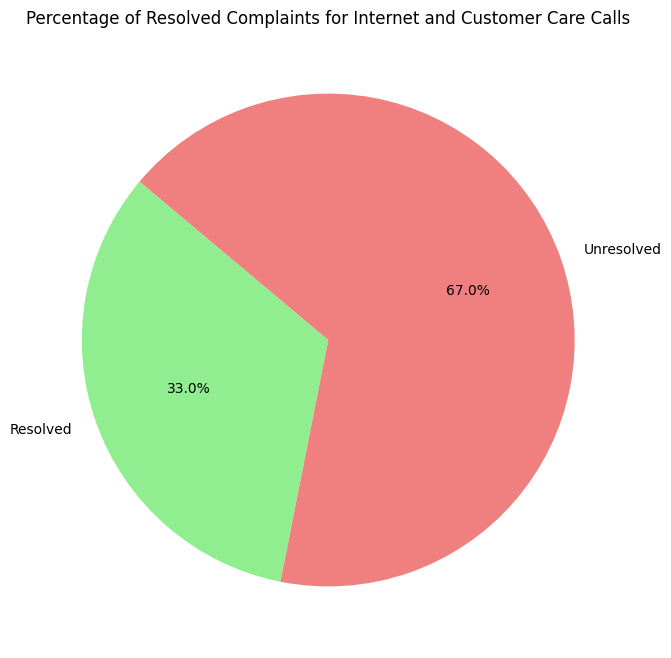

In [21]:
# Calculate the number of resolved and unresolved complaints
resolved_complaints = len(internet_customer_care_complaints[internet_customer_care_complaints['Status'] == 'Closed'])
unresolved_complaints = total_complaints - resolved_complaints

# Data for the pie chart
data = [resolved_complaints, unresolved_complaints]
labels = ['Resolved', 'Unresolved']
colors = ['lightgreen', 'lightcoral']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Resolved Complaints for Internet and Customer Care Calls')
plt.show()